# Ejercicio 8

A través de fotos aéreas se tienen medidas del alcance de un lanzador de proyectiles. Se tienen cinco valores (en metros): 880, 795, 782, 976, 178. Todas las mediciones tienen una incertidumbre de 5 metros. Los valores diferentes del alcance se deben a diferentes ángulos de lanzamiento, la velocidad inicial es aproximadamente la misma. Utilice el teorema de Bayes y el método de Metropolis-Hastings para encontrar la distribución de probabilidad de la velocidad inicial dados los datos observacionales. La respuesta debe estar implementada dentro de un archivo .py. El código debe producir una única gráfica de la distribución de probabilidad pedidad donde en el título se anotan la velocidad que maximiza la probabilidad, el valor medio y la desviación estándar.

[Pista](https://github.com/ComputoCienciasUniandes/MetodosComputacionales/blob/master/ejercicios/2018-10/ej26-1.md)

# solucion presentada en el curso

Esta solucion presentaba un problema pues se consideraba el angulo aleatorio y al ser un alcance máximo se debe dar a $45^{\circ}$ entonces se debe fijar el angulo a $45^{\circ}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def model(v, theta):
    g = 9.8
    return v**2 * np.sin(2*theta)/g

def loglikelihood(x_obs, sigmas, v, theta):
    d = x_obs -  model(v,theta)
    d = d/sigmas
    d = -0.5 * np.sum(d**2)
    return d

def logprior(v, theta):
    p = -np.inf
    if v < 100 and v >90 and theta >0 and theta<np.pi/2.0:
        p = 0.0
    return p

In [3]:
N = 100000
d_obs = np.array([880, 795, 782, 976, 178])
sigma_d = 5.0
lista_v = [np.random.uniform(90.0,100.0)]
lista_theta = [np.random.uniform(0, np.pi/2.0)]
logposterior = [loglikelihood(d_obs, sigma_d, lista_v[0], lista_theta[0]) + logprior(lista_v[0], lista_theta[0])]

sigma_delta_v = 1.0
sigma_delta_theta = 0.2

for i in range(1,N):
    propuesta_v  = lista_v[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_v)
    propuesta_theta  = lista_theta[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_theta)

    logposterior_viejo = loglikelihood(d_obs, sigma_d, lista_v[i-1], lista_theta[i-1]) + logprior(lista_v[i-1], lista_theta[i-1])
    logposterior_nuevo = loglikelihood(d_obs, sigma_d, propuesta_v, propuesta_theta) + logprior(propuesta_v, propuesta_theta)

    r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
    alpha = np.random.random()
    if(alpha<r):
        lista_v.append(propuesta_v)
        lista_theta.append(propuesta_theta)
        logposterior.append(logposterior_nuevo)
    else:
        lista_v.append(lista_v[i-1])
        lista_theta.append(lista_theta[i-1])
        logposterior.append(logposterior_viejo)


In [4]:
lista_v = np.array(lista_v)
lista_theta = np.array(lista_theta)
logposterior = np.array(logposterior)
maximo=np.max(lista_v)
val_esp= np.mean(lista_v)
val_esp2= np.mean(lista_v*lista_v)

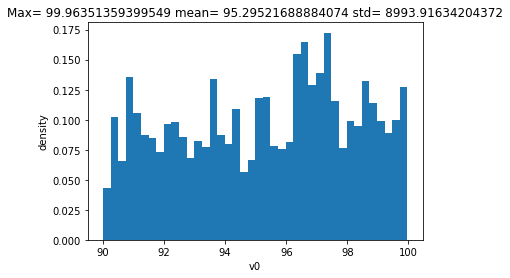

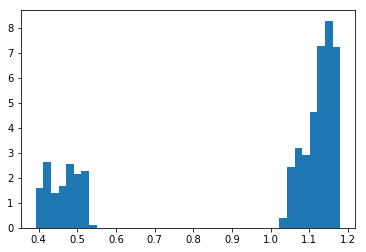

In [5]:
std= val_esp2-val_esp
_=plt.hist(lista_v, bins=40,density=True,)
plt.xlabel("v0")
plt.ylabel("density")
plt.title("Max= "+ str(maximo)+" mean= "+ str(val_esp)+" std= "+ str(std) )
plt.show()

_=plt.hist(lista_theta, bins=40,density=True)
plt.show()

# Corrección al ejercicio
Una de las diferencias es:
* Se fija el elemento inicial de la velocidad $v=10$ y $\theta = 45^{\circ}$
* se pone el prior de la velocidad en $0<v<1000$, $0<\theta<\pi/2$

In [6]:
def loglikelihood(x_obs, sigmas, v, theta):
    d = x_obs -  model(v,theta)
    d = d/sigmas
    d = -0.5 * np.sum(d**2)
    return d

def logprior(v, theta):
    # p = -np.inf
    if v < 1000 and v >0 and theta >0 and theta<np.pi/2.0:
        p = 0.0
    else:
        p=-np.inf
    return p


In [7]:
N = 100000
d_obs = np.array([880.0, 795.0, 782.0, 976.0, 178.0])
sigma_d = 5.0*np.ones(len(d_obs))

lista_v = [10.0]
lista_theta = [np.pi/4.]
sigma_delta_v = 1.0
sigma_delta_theta = 0.1

for i in range(1,N):
    propuesta_v  = lista_v[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_v)
    propuesta_theta  = lista_theta[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_theta)

    logposterior_viejo = loglikelihood(d_obs, sigma_d, lista_v[i-1], lista_theta[i-1]) + logprior(lista_v[i-1], lista_theta[i-1])
    logposterior_nuevo = loglikelihood(d_obs, sigma_d, propuesta_v, propuesta_theta) + logprior(propuesta_v, propuesta_theta)

    r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
    alpha = np.random.random()
    if(alpha<r):
        lista_v.append(propuesta_v)
        lista_theta.append(propuesta_theta)
        # logposterior.append(logposterior_nuevo)
    else:
        lista_v.append(lista_v[i-1])
        lista_theta.append(lista_theta[i-1])
        # logposterior.append(logposterior_viejo)

lista_v = np.array(lista_v)
lista_theta = np.array(lista_theta)
# logposterior = np.array(logposterior)

lista_v = lista_v[N//10:]
lista_theta = lista_theta[N//10:]
v_medio=np.mean(lista_v)
v_sigma=np.std(lista_v)
theta_medio=np.mean(lista_theta)
theta_sigma=np.std(lista_theta)

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


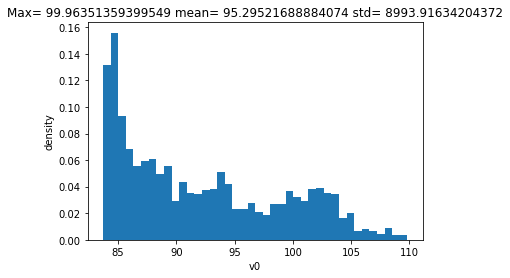

In [8]:
_=plt.hist(lista_v, bins=40,density=True,)
plt.xlabel("v0")
plt.ylabel("density")
plt.title("Max= "+ str(maximo)+" mean= "+ str(val_esp)+" std= "+ str(std) )
plt.show()

Text(0, 0.5, '$v_0$ (m/s)')

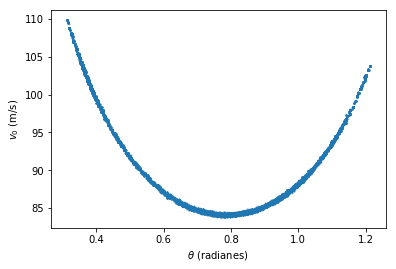

In [9]:
plt.scatter(lista_theta,lista_v, s=1.0, alpha=0.1)
plt.xlabel(r'$\theta$ (radianes)')
plt.ylabel(r'$v_0$ (m/s)')

# Otra forma de solucionarlo

In [10]:
def alcance(v, theta):
    g = 9.8
    return v**2 * np.sin(2*theta)/g

In [31]:
n_puntos = 10000000
d_obs = np.array([880.0, 795.0, 782.0, 976.0, 178.0])
sigma_d = 5.0

v_prior = np.random.uniform(0,100.0, n_puntos)
theta_prior = np.random.uniform(0, np.pi/2.0, n_puntos)

prior = {}
prior[0] = v_prior

for i in range(len(d_obs)):
    d = alcance(v_prior, theta_prior)    
    ii = (d > d_obs[i]-sigma_d) & (d < d_obs[i]+sigma_d)
    v_posterior = v_prior[ii]
    v_prior = np.random.choice(v_posterior,n_puntos)
    theta_prior = np.random.uniform(0, np.pi/2.0, n_puntos)
    prior[i+1] = v_prior


In [32]:
hist, edges = np.histogram(prior[5], bins=np.arange(0,100,0.1), density=True)


(array([1376538., 2296009., 1652637., 1177035.,  861057.,  693818.,
         604712.,  519324.,  363087.,  455783.]),
 array([97.54990034, 97.79488735, 98.03987435, 98.28486136, 98.52984837,
        98.77483538, 99.01982239, 99.2648094 , 99.50979641, 99.75478342,
        99.99977043]),
 <a list of 10 Patch objects>)

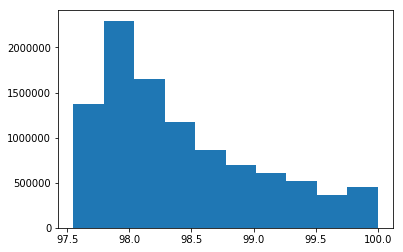

In [33]:
plt.hist(prior[5])

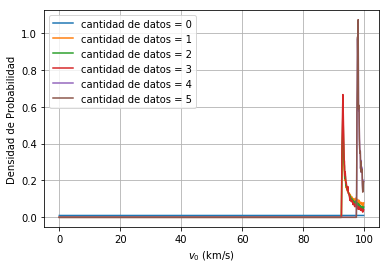

In [34]:
for i in range(len(d_obs)+1):
    hist, edges = np.histogram(prior[i], bins=np.arange(0,100,0.1), density=True)
    plt.plot(edges[:-1], hist, label='cantidad de datos = {}'.format(i))

plt.xlabel(r"$v_0$ (km/s)")
plt.ylabel("Densidad de Probabilidad")
plt.grid()
plt.legend()

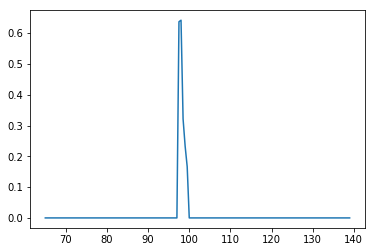

In [35]:
hist, edges = np.histogram(prior[5], bins=np.arange(0,140,0.5), density=True)
plt.plot(edges[130:-1], hist[130:], label='cantidad de datos = {}'.format(5))

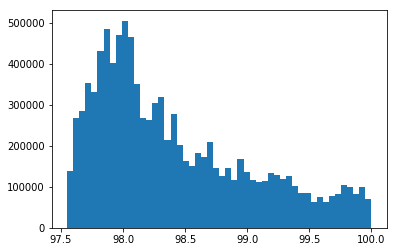

In [39]:
_=plt.hist(prior[5],bins=50)

In [37]:
np.max(prior[5])

99.99977042586747

In [38]:
datos=np.genfromtxt("datos.txt")
v=datos[:,0]
vsig=datos[:,1]
theta=datos[:,2]
thetasig=datos[:,3]
v=sum(v)/len(v)
vsig=sum(vsig)/len(vsig)
theta=sum(theta)/len(theta)
thetasig=sum(thetasig)/len(thetasig)

print("V= ",v," +/- ",vsig,"theta= ",theta," +/- ",thetasig)


V=  91.7946442321222  +/-  5.572828254523731 theta=  0.7859402592834573  +/-  0.26154123797489126
